In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Company Stock and Investment.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1984 non-null   datetime64[ns]
 1   Oil Investments          1984 non-null   float64       
 2   Gold Investments         1984 non-null   float64       
 3   Comp Stock               1984 non-null   float64       
 4   Other sharesInvestments  1984 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.6 KB


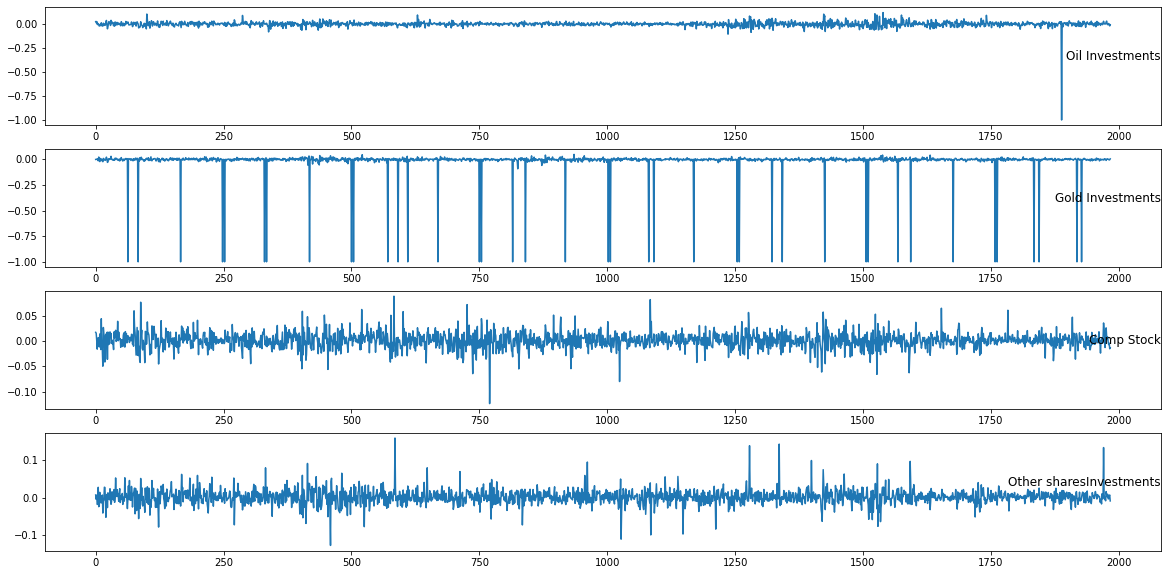

In [5]:
values = df.values
# specifying columns to plot
groups = [1, 2, 3, 4]
i = 1
# plotting each column
plt.figure(figsize=(20,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [6]:
c_stock=df.groupby(df['Date'].dt.strftime('%Y-%m'))['Comp Stock'].sum()
c_stock

Date
2009-12    0.017354
2010-01    0.021966
2010-02    0.080202
2010-03    0.108993
2010-04    0.016247
             ...   
2017-08    0.065951
2017-09   -0.057154
2017-10    0.041893
2017-11    0.006212
2017-12   -0.018938
Name: Comp Stock, Length: 97, dtype: float64

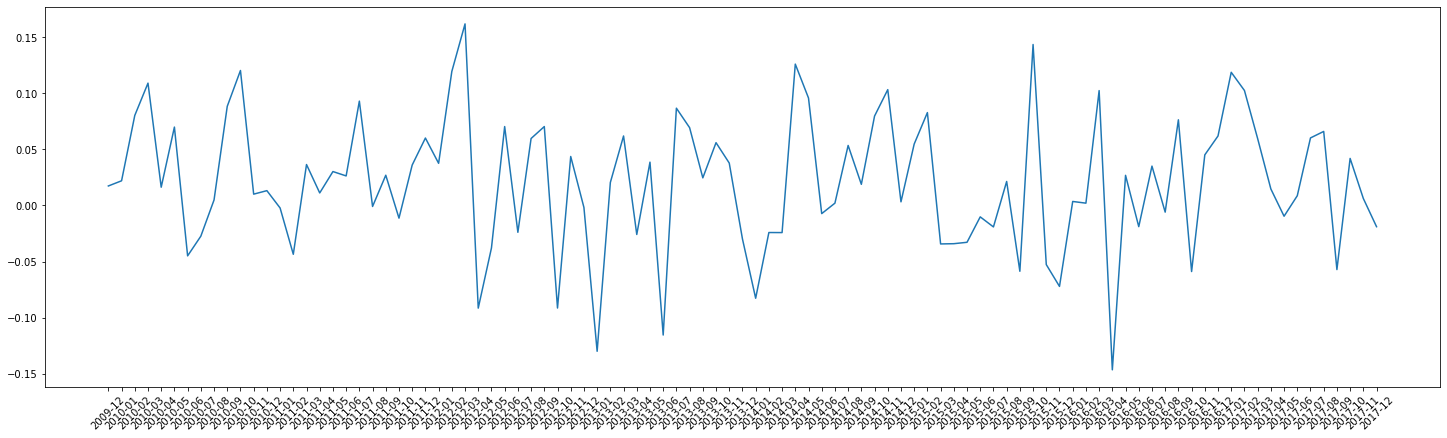

In [7]:
plt.figure(figsize=(25,7))
plt.plot(c_stock)
plt.tick_params(axis='x',rotation=45)

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plotting rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


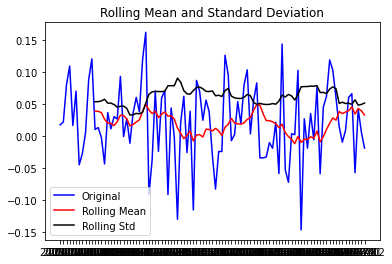

Results of dickey fuller test
Test Statistics               -9.792480e+00
p-value                        6.299651e-17
No. of lags used               0.000000e+00
Number of observations used    9.600000e+01
critical value (1%)           -3.500379e+00
critical value (5%)           -2.892152e+00
critical value (10%)          -2.583100e+00
dtype: float64


In [10]:
test_stationarity(c_stock)

In [11]:
c_stock=pd.DataFrame(c_stock)
c_stock.reset_index(inplace=True)
c_stock

,Date,Comp Stock
0,2009-12,0.017354
1,2010-01,0.021966
2,2010-02,0.080202
3,2010-03,0.108993
4,2010-04,0.016247
...,...,...
92,2017-08,0.065951
93,2017-09,-0.057154
94,2017-10,0.041893
95,2017-11,0.006212


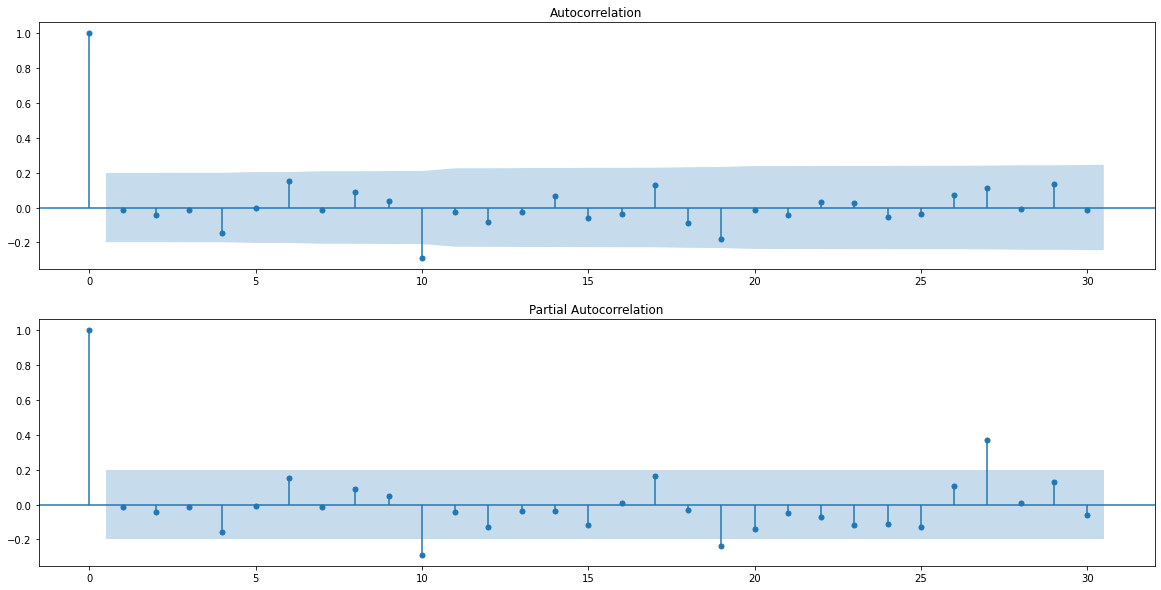

In [12]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(c_stock['Comp Stock'],lags=30,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(c_stock['Comp Stock'],lags=30,ax=ax2)

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [14]:
model=sm.tsa.statespace.SARIMAX(c_stock['Comp Stock'],order=(1,1,1),seasonal_order=(1,1,1,12)) # order of p, d and q
model_fit=model.fit()

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Comp Stock   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 101.761
Date:                            Sun, 01 Nov 2020   AIC                           -193.522
Time:                                    16:59:19   BIC                           -181.368
Sample:                                         0   HQIC                          -188.636
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0119      0.126      0.094      0.925      -0.235       0.259
ma.L1         -0.9853      0.302     -3.259      0.001      -1.578      -0.393
ar.S.L12      -0.1183      0.186     -0.636      0.525      -0.483       0.246
ma.S.L12      -0.9892      5.433     -0.182      0.856     -11.638       9.660
sigma2         0.0036      0.019      0.185      0.854      -0.034       0.041
===================================================================================
Ljung-Box (Q):                       51.05   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.11   Prob(JB):                         0.94
Heteroskedasticity (H):               1.16   Skew:                            -0.05
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
c_stock.shape

(97, 2)

<AxesSubplot:>

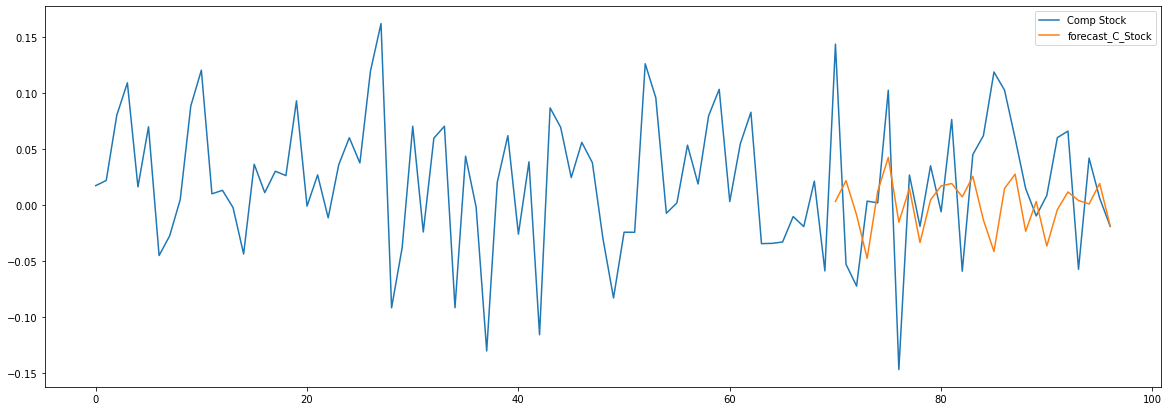

In [17]:
c_stock['forecast_C_Stock']=model_fit.predict(start=70,end=97,dynamic=True)
c_stock[['Comp Stock','forecast_C_Stock']].plot(figsize=(20,7))

In [18]:
c_stock

,Date,Comp Stock,forecast_C_Stock
0,2009-12,0.017354,NaN
1,2010-01,0.021966,NaN
2,2010-02,0.080202,NaN
3,2010-03,0.108993,NaN
4,2010-04,0.016247,NaN
...,...,...,...
92,2017-08,0.065951,0.011729
93,2017-09,-0.057154,0.004140
94,2017-10,0.041893,0.000978
95,2017-11,0.006212,0.019250


In [19]:
from pandas.tseries.offsets import DateOffset

c_stock['Date']=pd.to_datetime(c_stock['Date'])
predicted_dates=[c_stock.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
predicted_dates_df=pd.DataFrame(index=predicted_dates[1:])
predicted_dates_df.reset_index(inplace=True)
predicted_dates_df.rename(columns={'index':'Date'},inplace=True)
predicted_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


<AxesSubplot:>

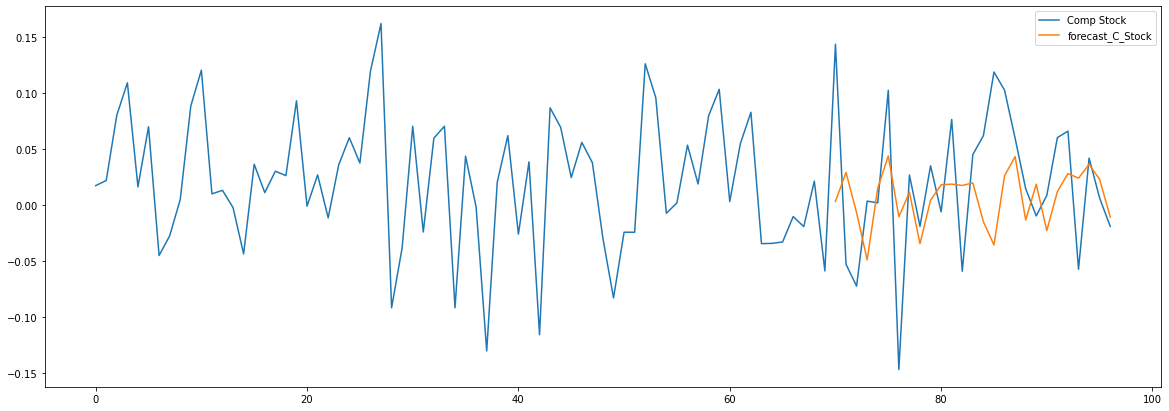

In [20]:
predict_df_1=pd.concat([c_stock,predicted_dates_df])
predict_df_1['forecast_C_Stock']=model_fit.predict(start=70,end=96)
predict_df_1[['Comp Stock','forecast_C_Stock']].plot(figsize=(20,7))

In [21]:
predict_df_1

,Date,Comp Stock,forecast_C_Stock
0,2009-12-01,0.017354,NaN
1,2010-01-01,0.021966,NaN
2,2010-02-01,0.080202,NaN
3,2010-03-01,0.108993,NaN
4,2010-04-01,0.016247,NaN
...,...,...,...
31,2020-08-01,NaN,NaN
32,2020-09-01,NaN,NaN
33,2020-10-01,NaN,NaN
34,2020-11-01,NaN,NaN


# Oil Investments

In [22]:
Oil_Inv=df.groupby(df['Date'].dt.strftime('%Y-%m'))['Oil Investments'].sum()
Oil_Inv

Date
2009-12    0.025417
2010-01   -0.029126
2010-02    0.184326
2010-03    0.095769
2010-04   -0.067218
             ...   
2017-08   -0.124324
2017-09    0.034083
2017-10    0.101426
2017-11    0.058930
2017-12    0.016362
Name: Oil Investments, Length: 97, dtype: float64

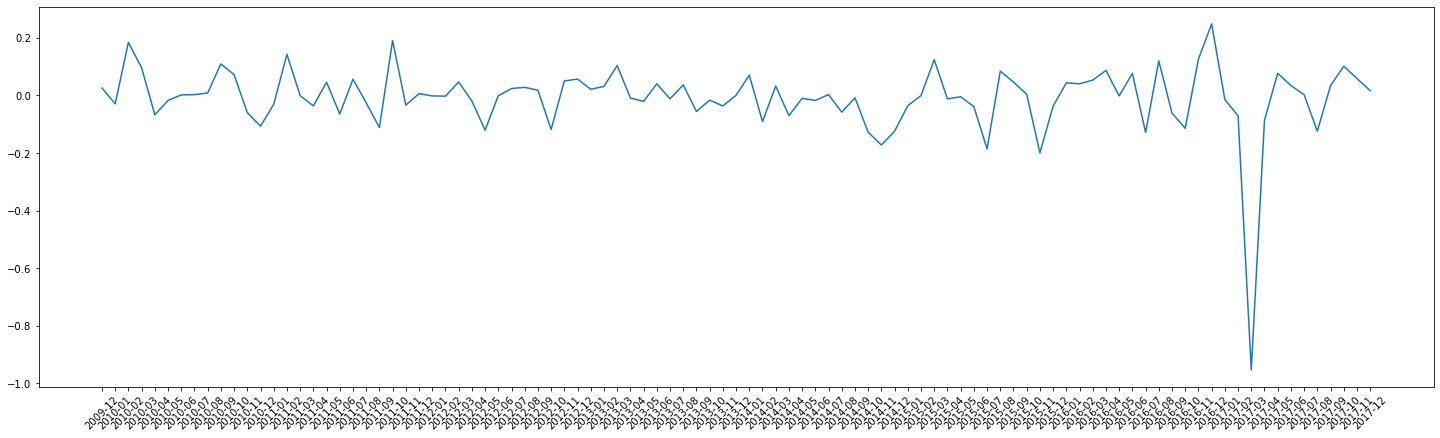

In [23]:
plt.figure(figsize=(25,7))
plt.plot(Oil_Inv)
plt.tick_params(axis='x',rotation=45)

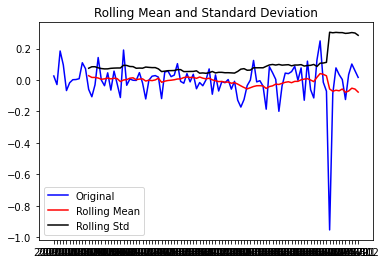

Results of dickey fuller test
Test Statistics               -7.126903e+00
p-value                        3.600571e-10
No. of lags used               2.000000e+00
Number of observations used    9.400000e+01
critical value (1%)           -3.501912e+00
critical value (5%)           -2.892815e+00
critical value (10%)          -2.583454e+00
dtype: float64


In [24]:
test_stationarity(Oil_Inv)

In [25]:
Oil_Inv=pd.DataFrame(Oil_Inv)
Oil_Inv.reset_index(inplace=True)
Oil_Inv

,Date,Oil Investments
0,2009-12,0.025417
1,2010-01,-0.029126
2,2010-02,0.184326
3,2010-03,0.095769
4,2010-04,-0.067218
...,...,...
92,2017-08,-0.124324
93,2017-09,0.034083
94,2017-10,0.101426
95,2017-11,0.058930


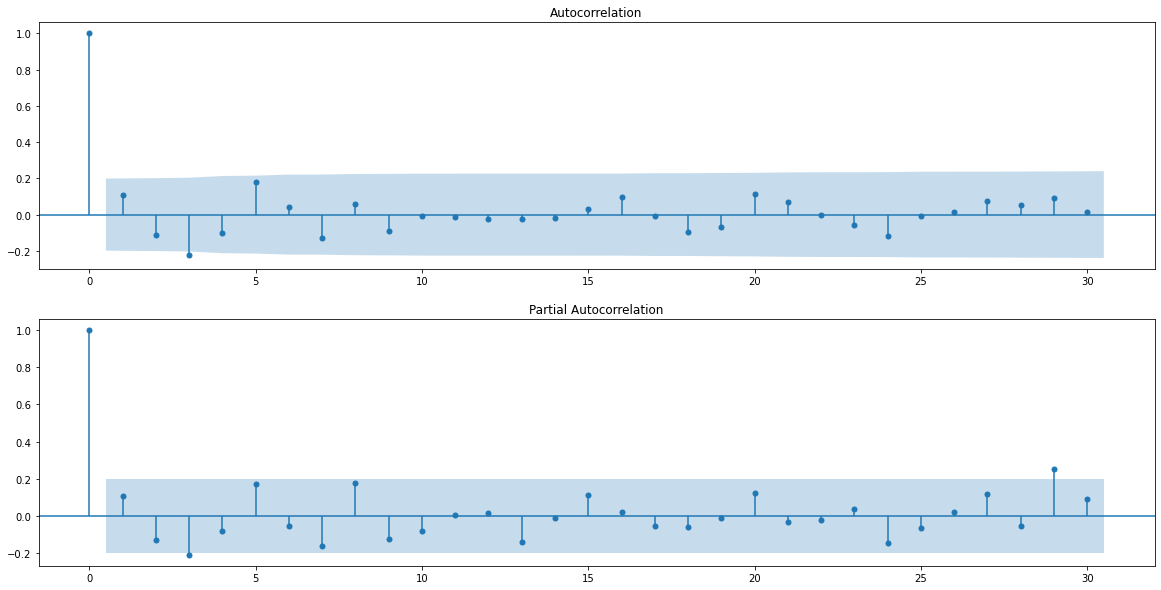

In [26]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(Oil_Inv['Oil Investments'],lags=30,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(Oil_Inv['Oil Investments'],lags=30,ax=ax2)

In [27]:
model=sm.tsa.statespace.SARIMAX(Oil_Inv['Oil Investments'],order=(1,1,1),seasonal_order=(1,1,1,12)) # order of p, d and q
model_fit=model.fit()

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Oil Investments   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  38.942
Date:                            Sun, 01 Nov 2020   AIC                            -67.885
Time:                                    16:59:27   BIC                            -55.731
Sample:                                         0   HQIC                           -62.999
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1148      0.222      0.517      0.605      -0.321       0.550
ma.L1         -0.9970      1.167     -0.854      0.393      -3.285       1.291
ar.S.L12       0.1745      0.899      0.194      0.846      -1.588       1.937
ma.S.L12      -0.6665      0.819     -0.814      0.416      -2.271       0.938
sigma2         0.0207      0.025      0.816      0.415      -0.029       0.070
===================================================================================
Ljung-Box (Q):                       24.41   Jarque-Bera (JB):              2476.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.69   Skew:                            -3.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
Oil_Inv.shape

(97, 2)

<AxesSubplot:>

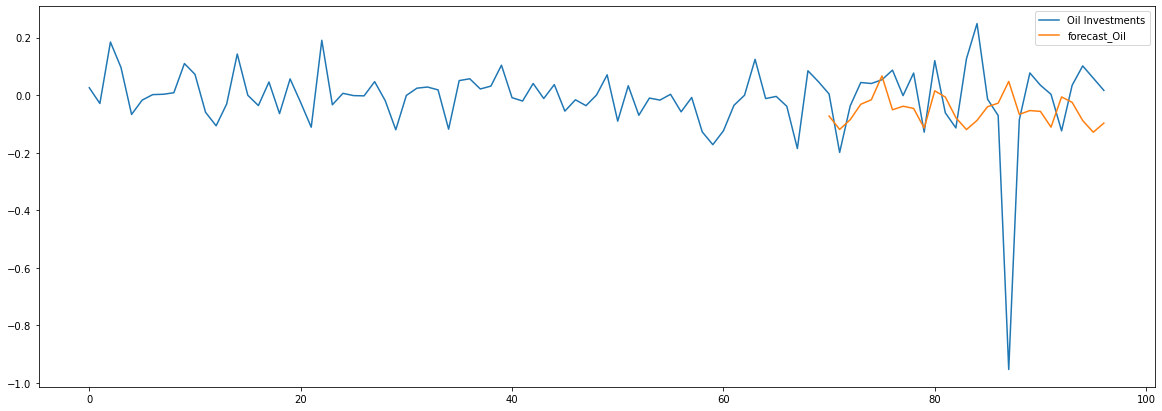

In [30]:
Oil_Inv['forecast_Oil']=model_fit.predict(start=70,end=97,dynamic=True)
Oil_Inv[['Oil Investments','forecast_Oil']].plot(figsize=(20,7))

In [31]:
Oil_Inv

,Date,Oil Investments,forecast_Oil
0,2009-12,0.025417,NaN
1,2010-01,-0.029126,NaN
2,2010-02,0.184326,NaN
3,2010-03,0.095769,NaN
4,2010-04,-0.067218,NaN
...,...,...,...
92,2017-08,-0.124324,-0.006405
93,2017-09,0.034083,-0.025181
94,2017-10,0.101426,-0.088494
95,2017-11,0.058930,-0.128974


In [32]:
Oil_Inv['Date']=pd.to_datetime(Oil_Inv['Date'])
predicted_dates=[Oil_Inv.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
predicted_dates_df=pd.DataFrame(index=predicted_dates[1:])
predicted_dates_df.reset_index(inplace=True)
predicted_dates_df.rename(columns={'index':'Date'},inplace=True)
predicted_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


<AxesSubplot:>

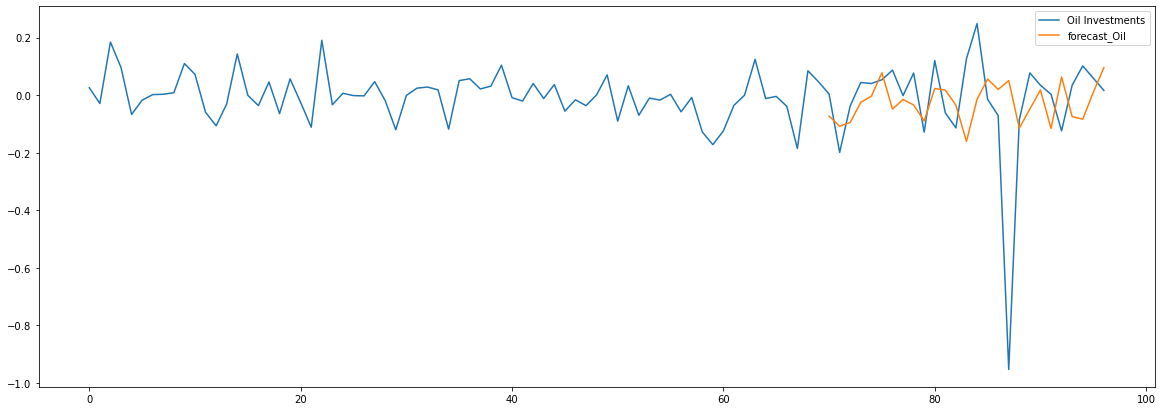

In [33]:
predict_df_2=pd.concat([Oil_Inv,predicted_dates_df])
predict_df_2['forecast_Oil']=model_fit.predict(start=70,end=96)
predict_df_2[['Oil Investments','forecast_Oil']].plot(figsize=(20,7))

In [34]:
predict_df_2

,Date,Oil Investments,forecast_Oil
0,2009-12-01,0.025417,NaN
1,2010-01-01,-0.029126,NaN
2,2010-02-01,0.184326,NaN
3,2010-03-01,0.095769,NaN
4,2010-04-01,-0.067218,NaN
...,...,...,...
31,2020-08-01,NaN,NaN
32,2020-09-01,NaN,NaN
33,2020-10-01,NaN,NaN
34,2020-11-01,NaN,NaN


# Gold Investments

In [35]:
Gold_Inv=df.groupby(df['Date'].dt.strftime('%Y-%m'))['Gold Investments'].sum()
Gold_Inv

Date
2009-12    0.000150
2010-01   -0.021293
2010-02    0.039871
2010-03   -0.979387
2010-04    0.013550
             ...   
2017-08   -1.996136
2017-09   -0.028615
2017-10   -0.010211
2017-11   -0.018359
2017-12    0.047473
Name: Gold Investments, Length: 97, dtype: float64

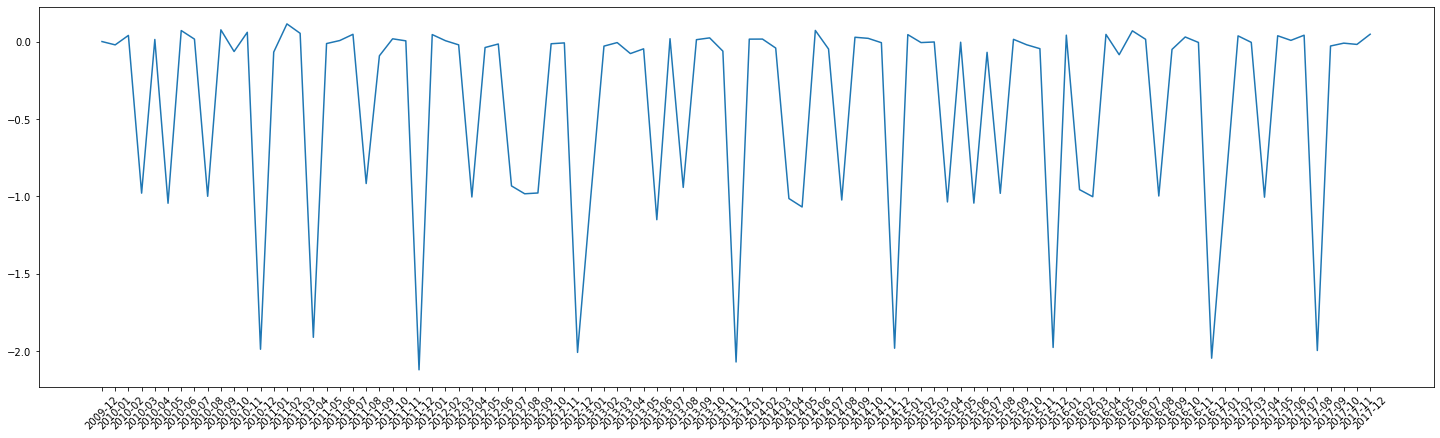

In [36]:
plt.figure(figsize=(25,7))
plt.plot(Gold_Inv)
plt.tick_params(axis='x',rotation=45)

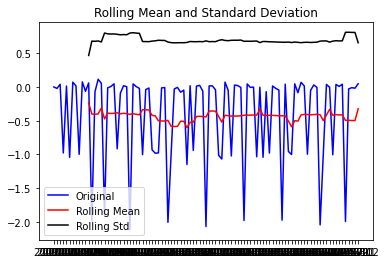

Results of dickey fuller test
Test Statistics                -3.933355
p-value                         0.001803
No. of lags used               11.000000
Number of observations used    85.000000
critical value (1%)            -3.509736
critical value (5%)            -2.896195
critical value (10%)           -2.585258
dtype: float64


In [37]:
test_stationarity(Gold_Inv)

In [38]:
Gold_Inv=pd.DataFrame(Gold_Inv)
Gold_Inv.reset_index(inplace=True)
Gold_Inv

,Date,Gold Investments
0,2009-12,0.000150
1,2010-01,-0.021293
2,2010-02,0.039871
3,2010-03,-0.979387
4,2010-04,0.013550
...,...,...
92,2017-08,-1.996136
93,2017-09,-0.028615
94,2017-10,-0.010211
95,2017-11,-0.018359


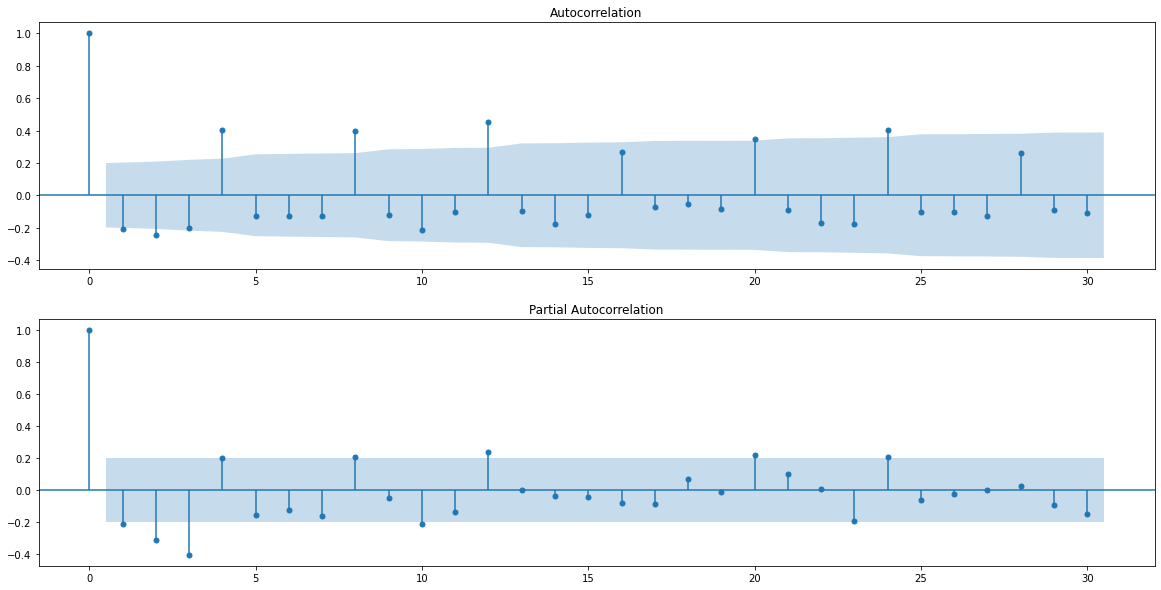

In [39]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(Gold_Inv['Gold Investments'],lags=30,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(Gold_Inv['Gold Investments'],lags=30,ax=ax2)

In [40]:
model=sm.tsa.statespace.SARIMAX(Gold_Inv['Gold Investments'],order=(1,1,1),seasonal_order=(1,1,1,12)) # order of p, d and q
model_fit=model.fit()

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Gold Investments   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -73.412
Date:                            Sun, 01 Nov 2020   AIC                            156.824
Time:                                    16:59:36   BIC                            168.978
Sample:                                         0   HQIC                           161.710
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1352      0.128     -1.053      0.292      -0.387       0.116
ma.L1         -0.9824      0.305     -3.225      0.001      -1.580      -0.385
ar.S.L12      -0.0697      0.223     -0.313      0.754      -0.506       0.367
ma.S.L12      -0.9830      4.970     -0.198      0.843     -10.725       8.759
sigma2         0.2341      1.185      0.197      0.843      -2.089       2.557
===================================================================================
Ljung-Box (Q):                       17.79   Jarque-Bera (JB):                 7.39
Prob(Q):                              1.00   Prob(JB):                         0.02
Heteroskedasticity (H):               0.95   Skew:                             0.01
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
Gold_Inv.shape

(97, 2)

<AxesSubplot:>

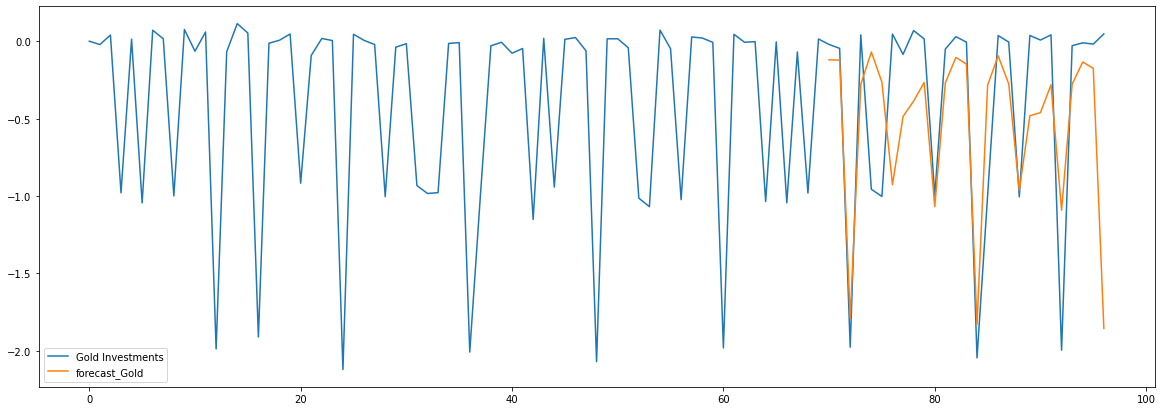

In [43]:
Gold_Inv['forecast_Gold']=model_fit.predict(start=70,end=97,dynamic=True)
Gold_Inv[['Gold Investments','forecast_Gold']].plot(figsize=(20,7))

In [44]:
Gold_Inv

,Date,Gold Investments,forecast_Gold
0,2009-12,0.000150,NaN
1,2010-01,-0.021293,NaN
2,2010-02,0.039871,NaN
3,2010-03,-0.979387,NaN
4,2010-04,0.013550,NaN
...,...,...,...
92,2017-08,-1.996136,-1.091298
93,2017-09,-0.028615,-0.277921
94,2017-10,-0.010211,-0.134101
95,2017-11,-0.018359,-0.174659


In [45]:
Gold_Inv['Date']=pd.to_datetime(Gold_Inv['Date'])
predicted_dates=[Gold_Inv.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
predicted_dates_df=pd.DataFrame(index=predicted_dates[1:])
predicted_dates_df.reset_index(inplace=True)
predicted_dates_df.rename(columns={'index':'Date'},inplace=True)
predicted_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


<AxesSubplot:>

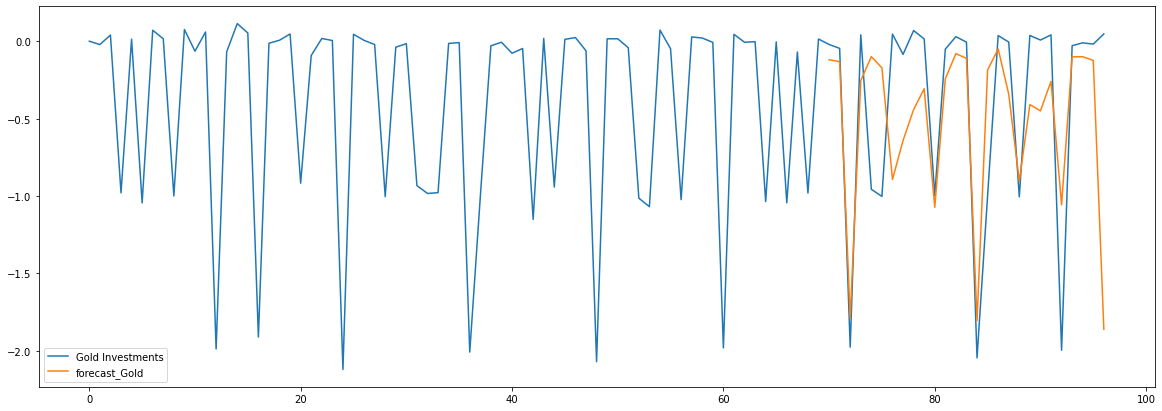

In [46]:
predict_df_3=pd.concat([Gold_Inv,predicted_dates_df])
predict_df_3['forecast_Gold']=model_fit.predict(start=70,end=96)
predict_df_3[['Gold Investments','forecast_Gold']].plot(figsize=(20,7))

In [47]:
predict_df_3

,Date,Gold Investments,forecast_Gold
0,2009-12-01,0.000150,NaN
1,2010-01-01,-0.021293,NaN
2,2010-02-01,0.039871,NaN
3,2010-03-01,-0.979387,NaN
4,2010-04-01,0.013550,NaN
...,...,...,...
31,2020-08-01,NaN,NaN
32,2020-09-01,NaN,NaN
33,2020-10-01,NaN,NaN
34,2020-11-01,NaN,NaN


# Other Shares Investments

In [48]:
Other_Inv=df.groupby(df['Date'].dt.strftime('%Y-%m'))['Other sharesInvestments'].sum()
Other_Inv

Date
2009-12    0.006848
2010-01   -0.014408
2010-02    0.051631
2010-03    0.129358
2010-04   -0.082007
             ...   
2017-08    0.036322
2017-09   -0.052548
2017-10    0.108013
2017-11    0.028225
2017-12    0.035433
Name: Other sharesInvestments, Length: 97, dtype: float64

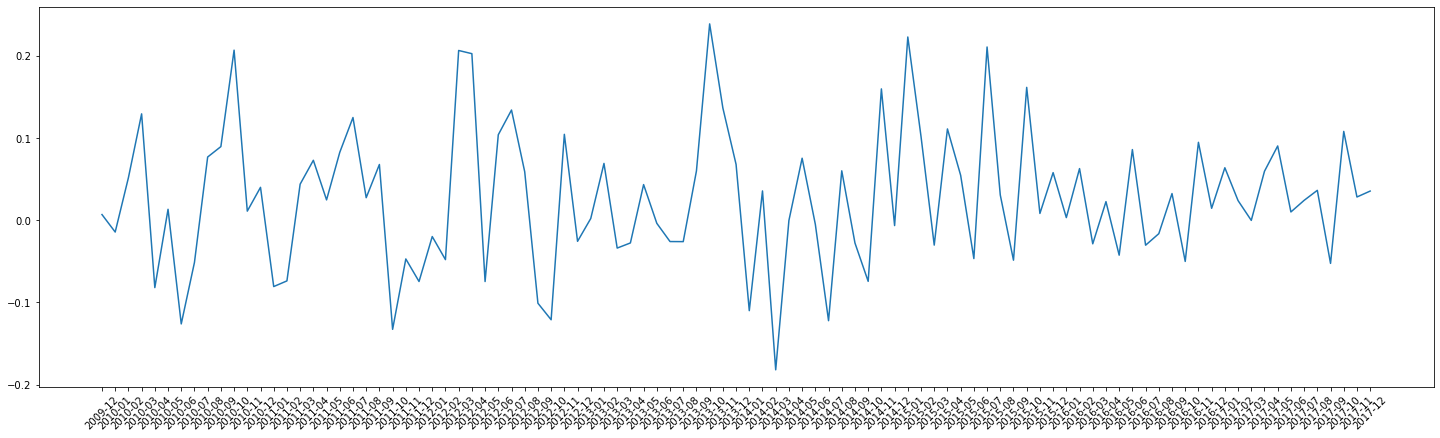

In [49]:
plt.figure(figsize=(25,7))
plt.plot(Other_Inv)
plt.tick_params(axis='x',rotation=45)

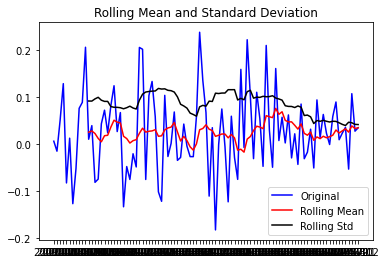

Results of dickey fuller test
Test Statistics               -9.419783e+00
p-value                        5.543064e-16
No. of lags used               0.000000e+00
Number of observations used    9.600000e+01
critical value (1%)           -3.500379e+00
critical value (5%)           -2.892152e+00
critical value (10%)          -2.583100e+00
dtype: float64


In [50]:
test_stationarity(Other_Inv)

In [51]:
Other_Inv=pd.DataFrame(Other_Inv)
Other_Inv.reset_index(inplace=True)
Other_Inv

,Date,Other sharesInvestments
0,2009-12,0.006848
1,2010-01,-0.014408
2,2010-02,0.051631
3,2010-03,0.129358
4,2010-04,-0.082007
...,...,...
92,2017-08,0.036322
93,2017-09,-0.052548
94,2017-10,0.108013
95,2017-11,0.028225


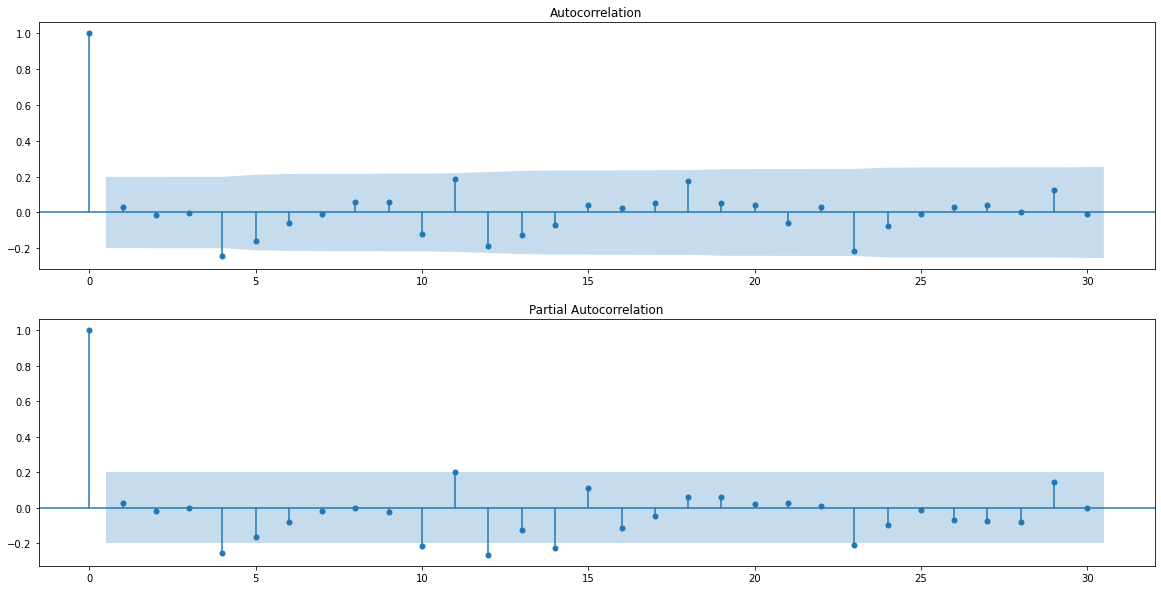

In [52]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
fig=statsmodels.graphics.tsaplots.plot_acf(Other_Inv['Other sharesInvestments'],lags=30,ax=ax1)
ax2=fig.add_subplot(212)
fig=statsmodels.graphics.tsaplots.plot_pacf(Other_Inv['Other sharesInvestments'],lags=30,ax=ax2)

In [53]:
model=sm.tsa.statespace.SARIMAX(Other_Inv['Other sharesInvestments'],order=(1,1,1),seasonal_order=(1,1,1,12)) # order of p, d and q
model_fit=model.fit()

In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Other sharesInvestments   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  69.532
Date:                            Sun, 01 Nov 2020   AIC                           -129.064
Time:                                    16:59:45   BIC                           -116.910
Sample:                                         0   HQIC                          -124.179
                                             - 97                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0594      0.140      0.426      0.670      -0.214       0.333
ma.L1         -0.9970      2.261     -0.441      0.659      -5.429       3.435
ar.S.L12      -0.1395      0.152     -0.916      0.360      -0.438       0.159
ma.S.L12      -0.9968     21.685     -0.046      0.963     -43.498      41.505
sigma2         0.0075      0.165      0.045      0.964      -0.316       0.331
===================================================================================
Ljung-Box (Q):                       29.89   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.88   Prob(JB):                         0.29
Heteroskedasticity (H):               0.27   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
Other_Inv.shape

(97, 2)

<AxesSubplot:>

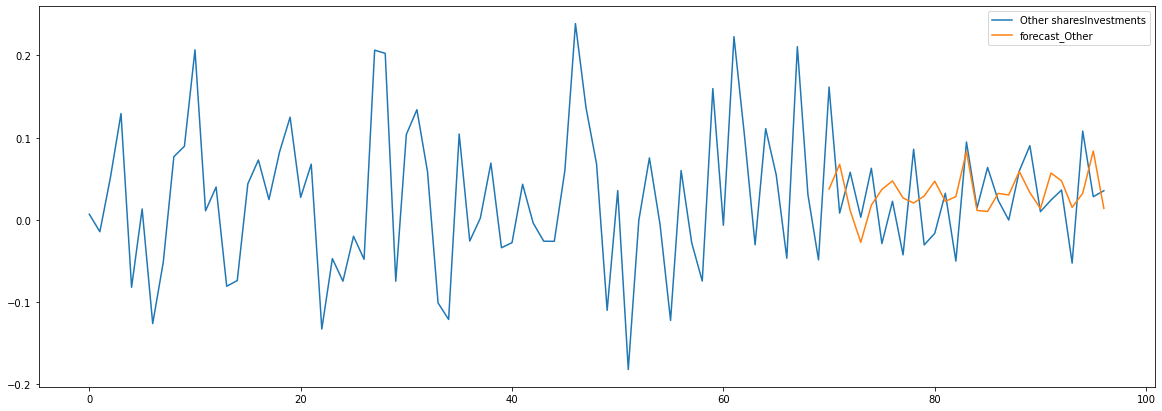

In [56]:
Other_Inv['forecast_Other']=model_fit.predict(start=70,end=97,dynamic=True)
Other_Inv[['Other sharesInvestments','forecast_Other']].plot(figsize=(20,7))

In [57]:
Other_Inv['Date']=pd.to_datetime(Other_Inv['Date'])
predicted_dates=[Other_Inv.iloc[-1,0]+ DateOffset(months=x)for x in range(0,37)]
predicted_dates_df=pd.DataFrame(index=predicted_dates[1:])
predicted_dates_df.reset_index(inplace=True)
predicted_dates_df.rename(columns={'index':'Date'},inplace=True)
predicted_dates_df

,Date
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


<AxesSubplot:>

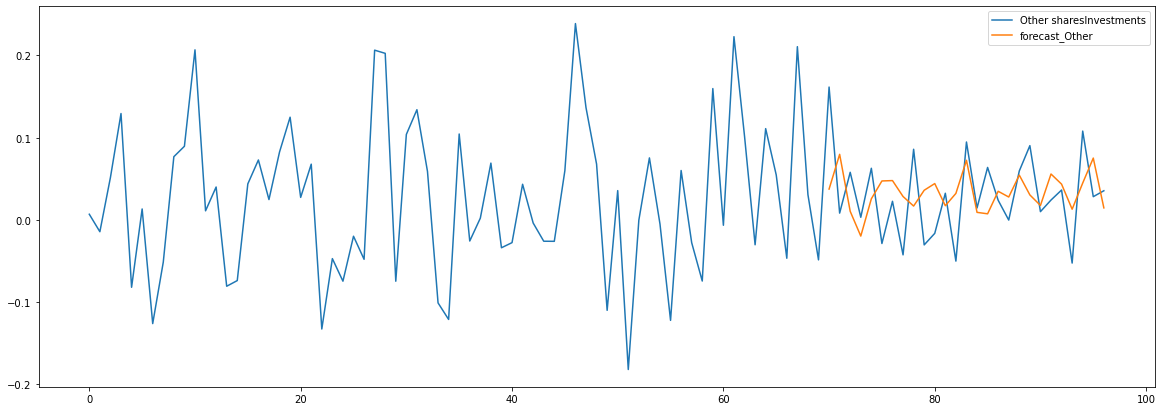

In [58]:
predict_df_4=pd.concat([Other_Inv,predicted_dates_df])
predict_df_4['forecast_Other']=model_fit.predict(start=70,end=96)
predict_df_4[['Other sharesInvestments','forecast_Other']].plot(figsize=(20,7))

In [59]:
predict_df_4

,Date,Other sharesInvestments,forecast_Other
0,2009-12-01,0.006848,NaN
1,2010-01-01,-0.014408,NaN
2,2010-02-01,0.051631,NaN
3,2010-03-01,0.129358,NaN
4,2010-04-01,-0.082007,NaN
...,...,...,...
31,2020-08-01,NaN,NaN
32,2020-09-01,NaN,NaN
33,2020-10-01,NaN,NaN
34,2020-11-01,NaN,NaN


In [60]:
final_df=pd.concat([predict_df_1,predicted_dates_df,predict_df_2,predict_df_3,predict_df_4])

In [61]:
final_df

,Date,Comp Stock,forecast_C_Stock,Oil Investments,forecast_Oil,Gold Investments,forecast_Gold,Other sharesInvestments,forecast_Other
0,2009-12-01,0.017354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-01,0.021966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-01,0.080202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-03-01,0.108993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-01,0.016247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
31,2020-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
final_df[70:95]

,Date,Comp Stock,forecast_C_Stock,Oil Investments,forecast_Oil,Gold Investments,forecast_Gold,Other sharesInvestments,forecast_Other
70,2015-10-01,0.143417,0.003328,NaN,NaN,NaN,NaN,NaN,NaN
71,2015-11-01,-0.052714,0.029140,NaN,NaN,NaN,NaN,NaN,NaN
72,2015-12-01,-0.072163,-0.006773,NaN,NaN,NaN,NaN,NaN,NaN
73,2016-01-01,0.003545,-0.048736,NaN,NaN,NaN,NaN,NaN,NaN
74,2016-02-01,0.002038,0.015000,NaN,NaN,NaN,NaN,NaN,NaN
75,2016-03-01,0.102341,0.043861,NaN,NaN,NaN,NaN,NaN,NaN
76,2016-04-01,-0.146489,-0.010417,NaN,NaN,NaN,NaN,NaN,NaN
77,2016-05-01,0.026827,0.011381,NaN,NaN,NaN,NaN,NaN,NaN
78,2016-06-01,-0.018894,-0.034376,NaN,NaN,NaN,NaN,NaN,NaN
79,2016-07-01,0.035050,0.004340,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
final_df.to_csv('Company Stock-Investment Predicted.csv') 